https://seaborn.pydata.org/generated/seaborn.regplot.html

In [1]:
import seaborn as sns; sns.set(color_codes=True)

In [5]:
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### plot the relationship between two variables in a DataFrame

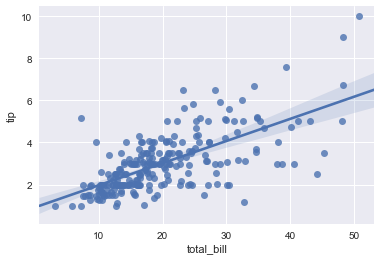

In [6]:
sns.regplot(x="total_bill", y="tip", data=tips)

### plot with two variables defined as numpy arrays; use a different color

In [9]:
import numpy as np; np.random.seed(8)

In [7]:
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]

In [10]:
x, y = np.random.multivariate_normal(mean, cov, 80).T

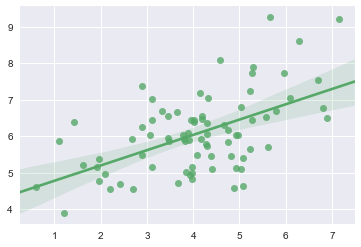

In [11]:
sns.regplot(x=x, y=y, color="g")

### plot with two variables defined as pandas Series; use a different marker

In [12]:
import pandas as pd

In [13]:
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")

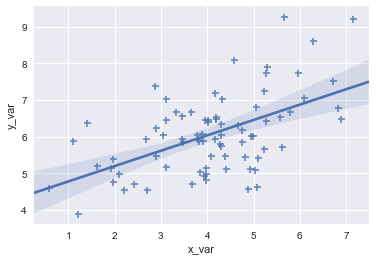

In [14]:
sns.regplot(x=x, y=y, marker="+")

##### use a 68% confidence interval, which corresponds with the standard error of the estimate

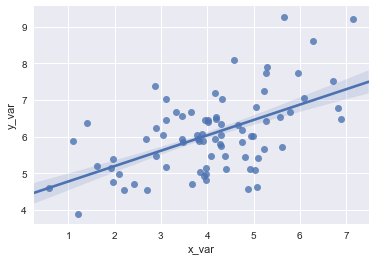

In [15]:
sns.regplot(x=x, y=y, ci=68)

### plot with a discrete x variable and add some jitter

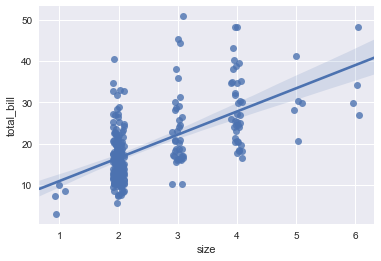

In [17]:
sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1)

### plot with a discrete x variable showing means and confidence intervals for unique values

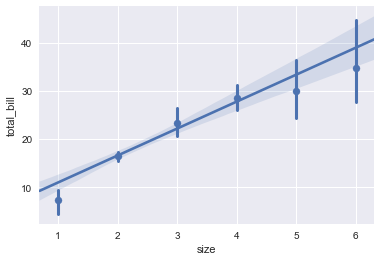

In [18]:
sns.regplot(x="size", y="total_bill", data=tips,
            x_estimator=np.mean)

### plot with a continuous variable divided into discrete bins

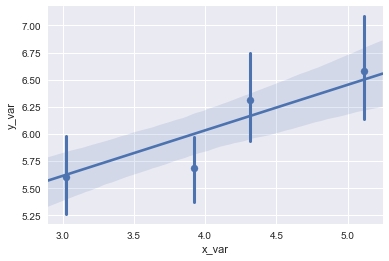

In [19]:
sns.regplot(x=x, y=y, x_bins=4)

### fit a higher-order polynomial regression and truncate the model prediction

In [20]:
ans = sns.load_dataset("anscombe")

In [21]:
ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


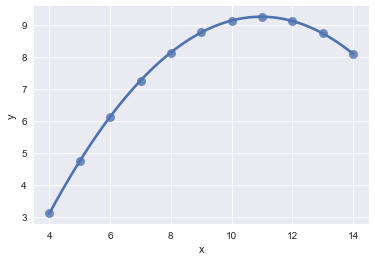

In [22]:
sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"],
           scatter_kws={"s": 80},
           order=2, ci=None, truncate=True)

### fit a robust regression and don’t plot a confidence interval

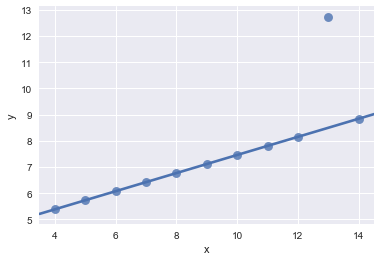

In [23]:
sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "III"],
           scatter_kws={"s": 80},
           robust=True, ci=None)

### fit a logistic regression; jitter the y variable and use fewer bootstrap iterations

In [24]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175

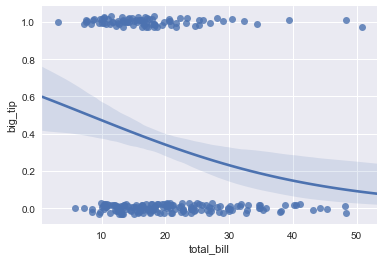

In [25]:
sns.regplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, n_boot=500, y_jitter=.03)

### fit the regression model using log(x) and truncate the model prediction

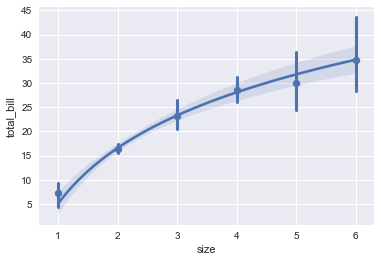

In [26]:
sns.regplot(x="size", y="total_bill", data=tips,
           x_estimator=np.mean, logx=True, truncate=True)

In [ ]:
sns.regplot(x="size", y="total_bill", data=tips,
           x_estimator=np.mean, logx=True, truncate=False)